# MLflow Tracking

The MLflow Tracking is an API and UI for logging parameters, code versions, metrics, and output files when running your machine learning code and for later visualizing the results.

## Concepts
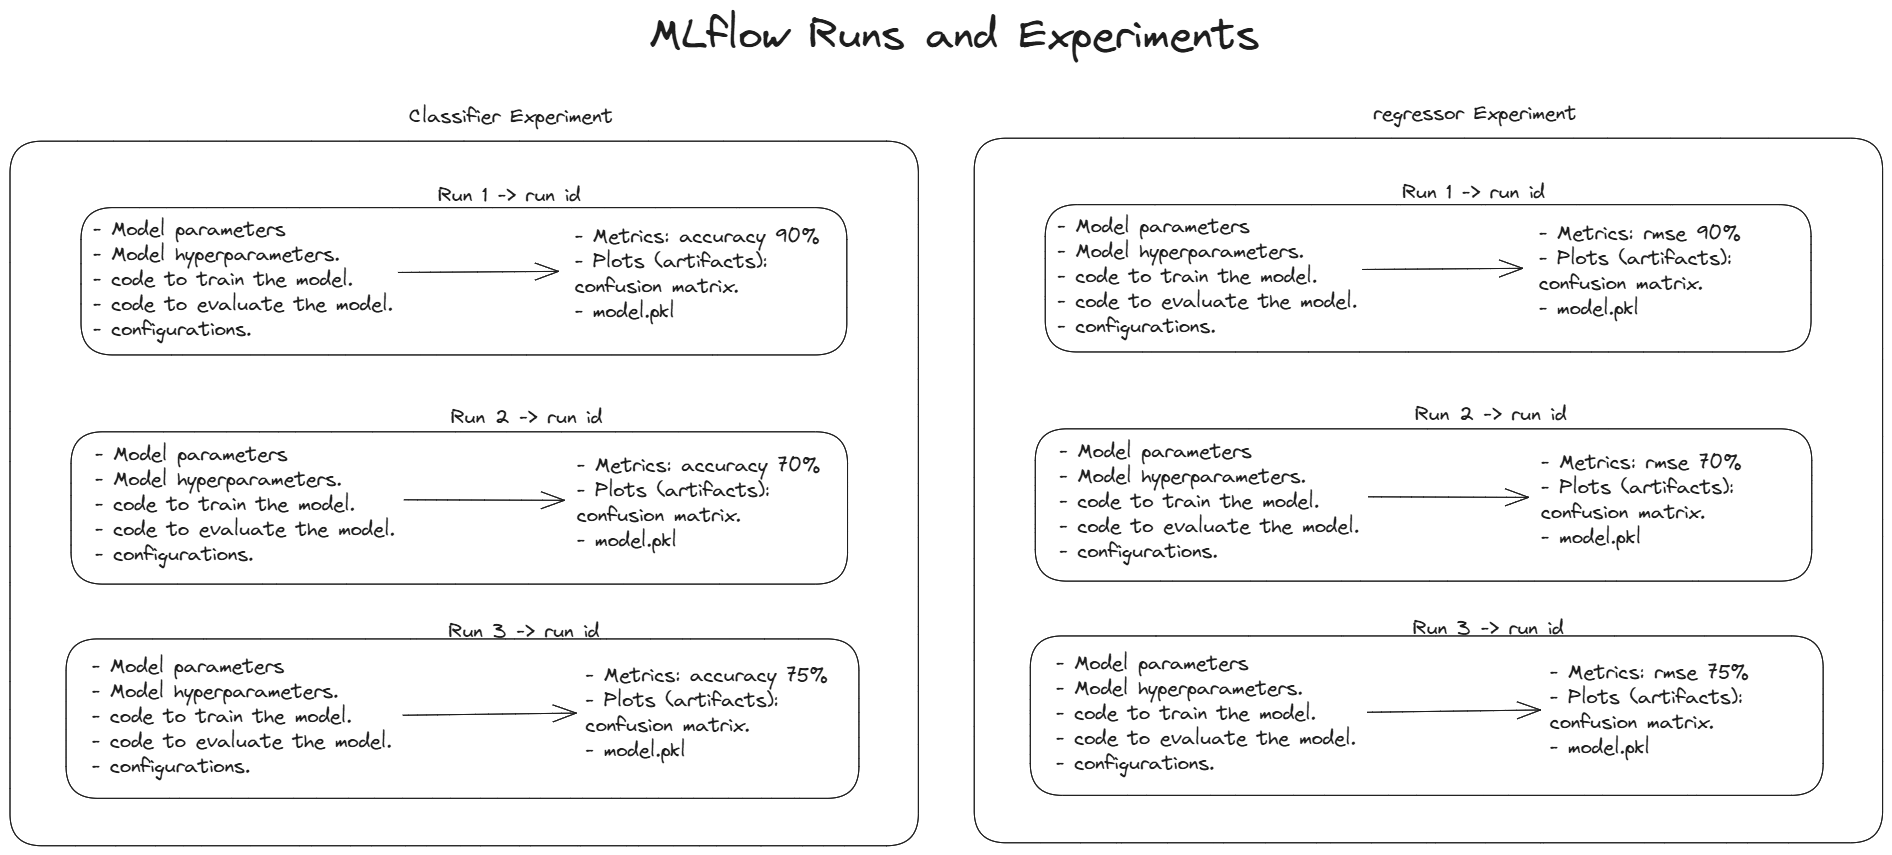

<!-- ![Taken from MLflow Docs](https://mlflow.org/docs/latest/_images/tracking-basics.png) -->

**Runs**

MLflow Tracking is organized around the concept of runs, which are executions of some piece of data science code, for example, a single python train.py execution.


**Experiments** 

An experiment groups together runs for a specific task. 




In [1]:
import mlflow

# Create an MLflow Experiment

We can create a MLflow experiment using:

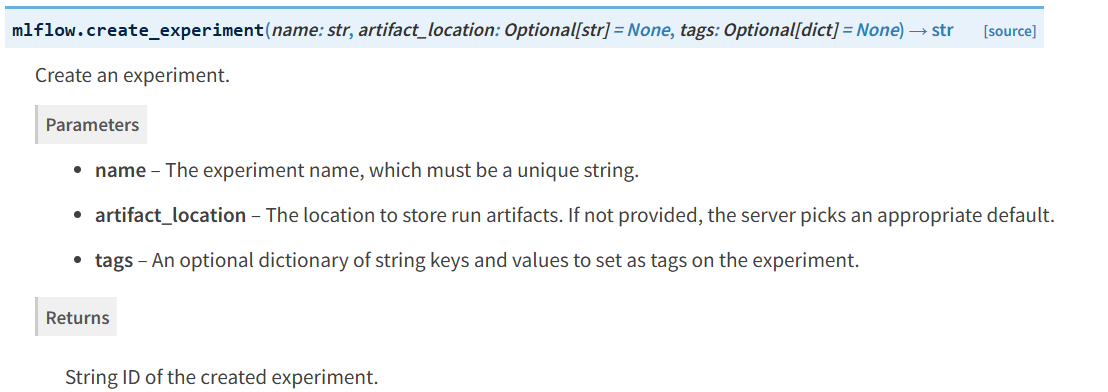

In [2]:
# creating a new experiment providing the name
experiment_id = mlflow.create_experiment(name="test-experiment")
print(f"Experiment ID: {experiment_id}")

Experiment ID: 195072875806445847


In [3]:
with mlflow.start_run(run_name="test-run") as run:
    print(f"Run ID: {run.info.run_id}")
    mlflow.log_param("param1", 1)

Run ID: 854c2adf253447d8aa07648924555ce1


## Set an experiment as the active experiment

We can set an experiment as the active experiment using:

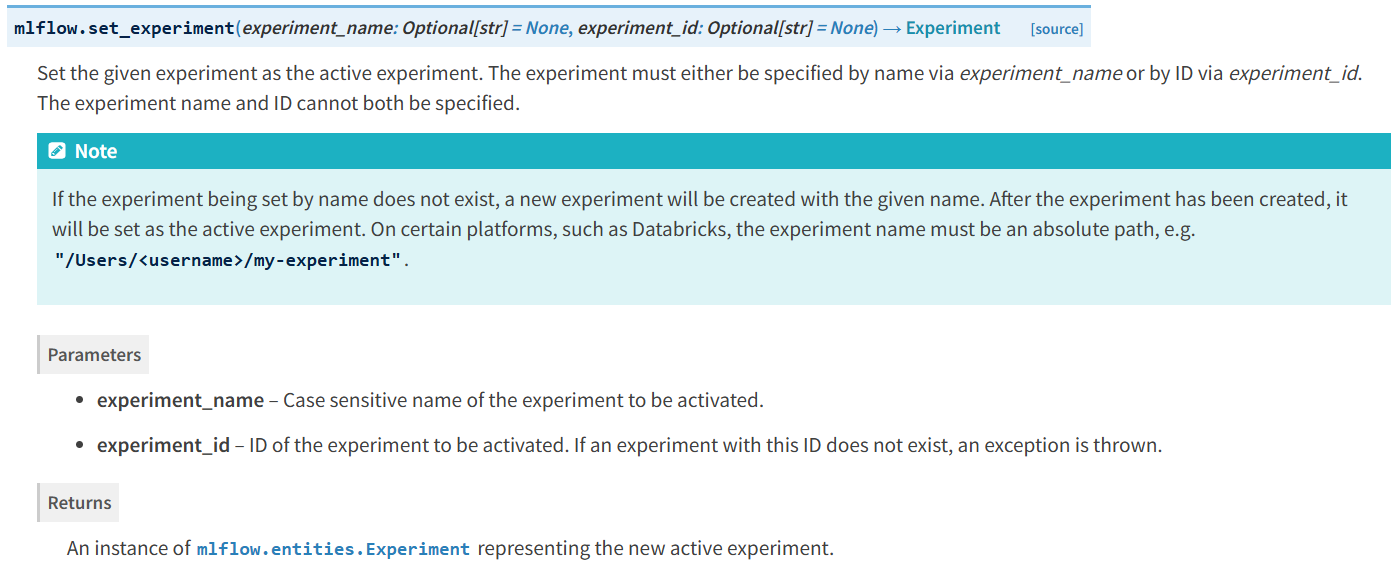

In [4]:
experiment = mlflow.set_experiment(experiment_name="test-experiment")

In [ ]:
print(f"Object Type: {type(experiment).__name__} \n")
print(experiment.to_proto())

In [ ]:
with mlflow.start_run(run_name="test-run") as run:
    print(f"Run ID: {run.info.run_id}")
    mlflow.log_param("param1", 1)

In [ ]:
# Loggin an artifact
with mlflow.start_run(run_name="test-run") as run:
    print(f"Run ID: {run.info.run_id}")
    mlflow.log_text("This is a text artifact", "artifact.txt")


## Creating an experiment using a different artifact location

In [2]:
from mlflow_for_ml_dev.utils.utils import get_root_project

In [ ]:
print(get_root_project())

In [ ]:
experiment_id = mlflow.create_experiment(name="test-experiment-2", artifact_location=get_root_project().as_uri())
print(f"Experiment ID: {experiment_id}")

In [11]:
experiment = mlflow.set_experiment(experiment_name="test-experiment-2")

In [ ]:
# Loggin an artifact
run_ids = []
with mlflow.start_run(run_name="test-run") as run:
    print(f"Run ID: {run.info.run_id}")
    mlflow.log_param("param1", 1)
    mlflow.log_text("This is a text artifact", "artifact.txt")

    run_ids.append(run.info.run_id)

In [ ]:
# Loggin an artifact
with mlflow.start_run(run_name="test-run") as run:
    print(f"Run ID: {run.info.run_id}")
    mlflow.log_text("This is a text artifact", "artifact.txt")
    mlflow.log_param("param1", 1)

    run_ids.append(run.info.run_id)

### Clean Up

In [ ]:
import shutil

shutil.rmtree("mlruns")
print("mlruns removed")

# remove run ids folders
for run_id in run_ids:
    shutil.rmtree(get_root_project() / run_id)
    print(f"Run {run_id} removed")

# Specify Tracking URI

We can specify the tracking URI Using:

```python
mlflow.set_tracking_uri(uri: Union[str, pathlib.Path]) → None
```
* uri
    * An empty string, or a local file path, prefixed with file:/. Data is stored locally at the provided file (or ./mlruns if empty).

    * An HTTP URI like https://my-tracking-server:5000.

    * A Databricks workspace, provided as the string “databricks” or, to use a Databricks CLI profile, “databricks://<profileName>”.
    
    * A pathlib.Path instance


In [ ]:
artifact_location = get_root_project() / "mlruns"

mlflow.set_tracking_uri(artifact_location.as_uri())
print(artifact_location)

In [ ]:
# Create experiment
experiment_name = "test-experiment-3"
experiment_id = mlflow.create_experiment(name=experiment_name)
print(f"Experiment ID: {experiment_id}")

After creating an experiment is necessary to set it as active experiment, otherwise mlflow would use the Default experiment.

In [ ]:
experiment = mlflow.set_experiment(experiment_name=experiment_name)

print(f"Object Type: {type(experiment).__name__} \n")
print(experiment.to_proto())

In [ ]:
with mlflow.start_run(run_name="test-run") as run:
    
    print(f"Run ID: {run.info.run_id}")

    mlflow.log_param("param1", 1)
    mlflow.log_text("This is a text artifact", "artifact.txt")

### Error!

In [ ]:
mlflow.create_experiment(name=experiment_name)

# Two Options

## Capture the exception

In [ ]:
try:
    experiment_id = mlflow.create_experiment(name=experiment_name)
    print(f"Experiment ID: {experiment_id}")
except Exception as e:
    print(f"Error: {e}")

## Use `mlflow.set_experiment`

In [ ]:
# Since the experiment already exists, we can set it as the active experiment
experiment = mlflow.set_experiment(experiment_name = experiment_name)

# we can also create the experiment if it does not exist
new_experiment_name = "main-concepts"
experiment = mlflow.set_experiment(experiment_name = new_experiment_name)

print(f"Object Type: {type(experiment).__name__} \n")
print(experiment.to_proto())

In [ ]:
# adding some data to the experiment
with mlflow.start_run(run_name="test-run") as run:
    
    print(f"Run ID: {run.info.run_id}")

    mlflow.log_param("param1", 1)
    mlflow.log_text("This is a text artifact", "artifact.txt")

In [3]:
from mlflow_for_ml_dev.experiments.exp_utils import get_or_create_experiment

In [ ]:
experiment = get_or_create_experiment(experiment_name = new_experiment_name)

print(f"Object Type: {type(experiment).__name__} \n")
print(experiment.to_proto())

## Adding tags

In [ ]:
experiment_name = "main-concepts-02"
experiment = get_or_create_experiment(
    experiment_name=experiment_name,
    tags={"topic":"experiment_management", "project_name":"UNKNOWN"}
)

In [ ]:
# get the experiment tags
experiment.tags

## Adding a description

In [ ]:
experiment_name = "main-concepts-03"
experiment = get_or_create_experiment(
    experiment_name=experiment_name,
    tags={
        "topic":"experiment_management",
        "project_name":"UNKNOWN",
        "mlflow.note.content":"This is a test experiment"})

In [ ]:
# get the experiment tags
experiment.tags

## Update Tags

In [ ]:
experiment_name = "main-concepts-04"
experiment = get_or_create_experiment(experiment_name)
# experiment tags
experiment.tags

In [9]:
tags = {
    "tag1": "value1",
    "tag2": "value2"
}
mlflow.set_experiment_tags(tags=tags)

In [ ]:
# get the updated experiment object
experiment = get_or_create_experiment(experiment_name)

# get the experiment tags
experiment.tags

In [11]:
# Update Value of tag1
mlflow.set_experiment_tag(key="tag1", value="new_value1")

# get the updated experiment object
experiment = get_or_create_experiment(experiment_name)

In [ ]:
# get the experiment tags
experiment.tags

## Using the client to set a tag

In [13]:
client = mlflow.MlflowClient()

In [ ]:
experiment.experiment_id

In [15]:
client.set_experiment_tag(experiment_id = experiment.experiment_id, key="tag3", value="value3")

In [ ]:
experiment = get_or_create_experiment(experiment_name)

# get the experiment tags
experiment.tags

## Rename Experiment

In [ ]:
print(experiment.to_proto())

In [20]:
new_name = "main-concepts-04-renamed"
client.rename_experiment(experiment_id = experiment.experiment_id, new_name=new_name)

In [ ]:
experiment = get_or_create_experiment(new_name)

experiment.name

## Clean Up

In [22]:
main_concepts_experiments = mlflow.search_experiments(filter_string="name LIKE 'main-concepts%'")
test_experiments = mlflow.search_experiments(filter_string="name LIKE 'test-experiment%'")
experiments = main_concepts_experiments + test_experiments

In [ ]:
for exp in experiments:
    print(exp.experiment_id, exp.name, exp.tags)

In [ ]:
for experiment in experiments:
    print(f"Deleting: {experiment.name}")
    mlflow.delete_experiment(experiment.experiment_id)